In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
# Setup visualization styles
sns.set(style="whitegrid")
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

In [25]:
transactions = pd.read_csv('Transactions.csv')
product = pd.read_csv('Products.csv')
customer = pd.read_csv('Customers.csv')

In [26]:
transactions.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [27]:
product.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [28]:
customer.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [29]:
# Merge Customers and Transactions data (if not already merged)
data = pd.merge(customer,
                transactions.groupby('CustomerID').agg(
                    total_spent=('TotalValue', 'sum'),
                    total_transactions=('TransactionID', 'count')
                ).reset_index(),
                on='CustomerID', how='left').fillna(0)

In [32]:
# Encode and normalize features
data['Region'] = LabelEncoder().fit_transform(data['Region'])
features = StandardScaler().fit_transform(data[['Region', 'total_spent', 'total_transactions']])


In [ ]:
# KMeans clustering code
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=42)  # Explicitly set n_init if desired
kmeans.fit(clustering_data)

In [36]:
optimal_k, db_indexes = 2, []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(features)
    db_indexes.append(davies_bouldin_score(features, kmeans.labels_))
    if db_indexes[-1] == min(db_indexes):
        optimal_k = k

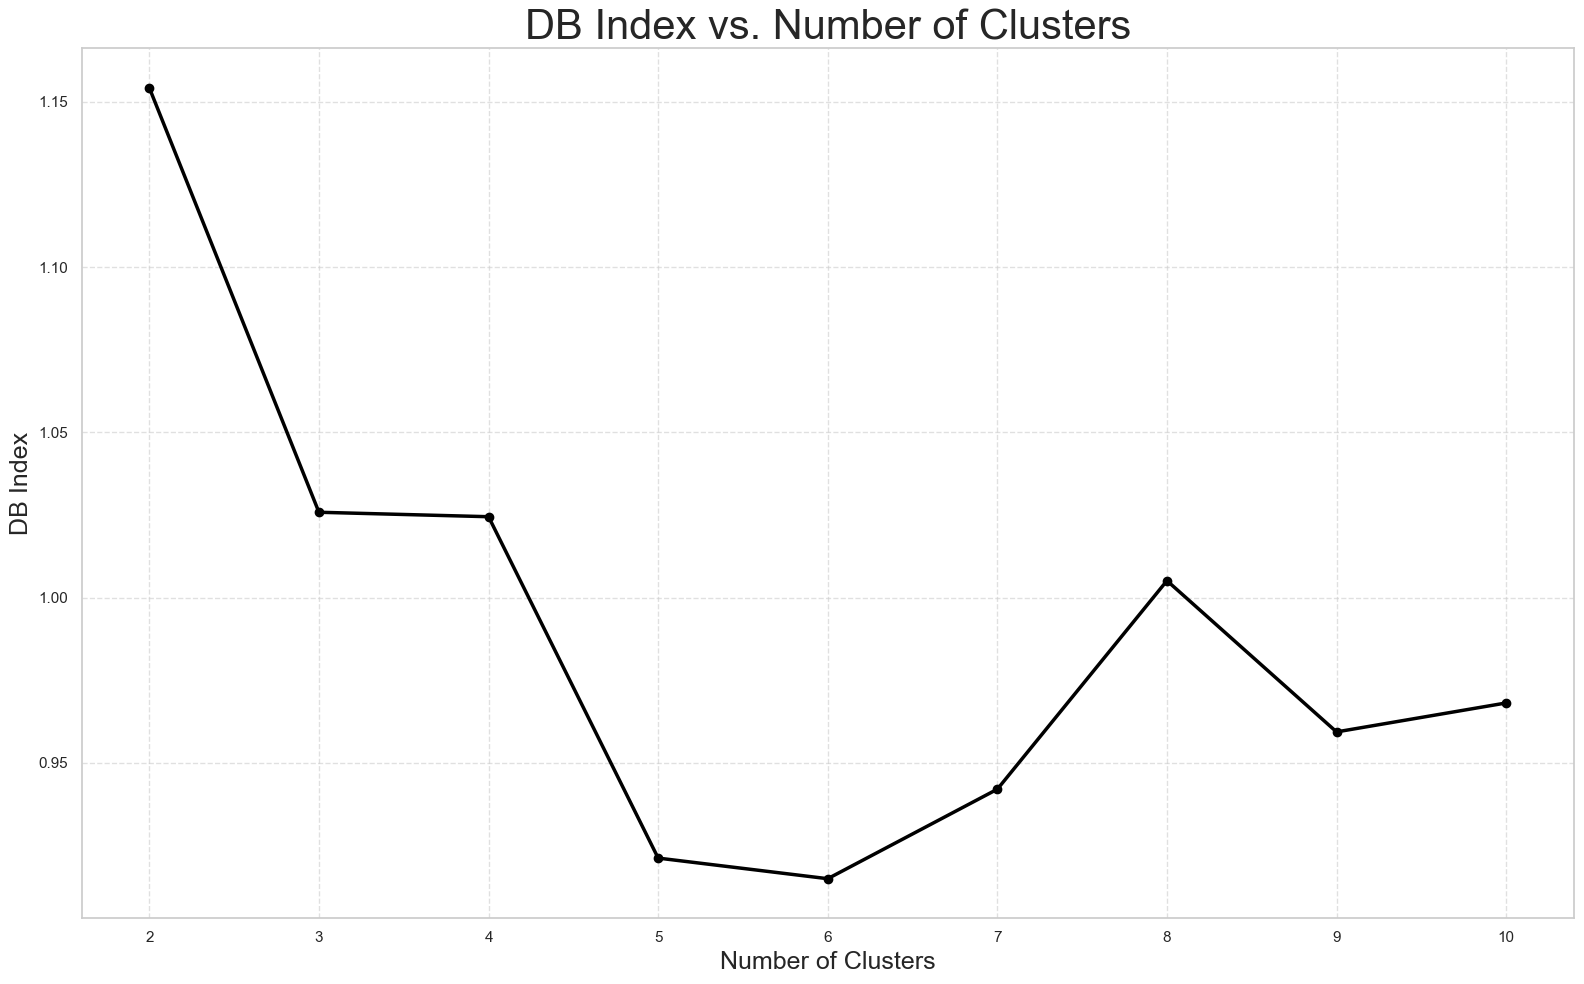

In [63]:
plt.figure(figsize=(16, 10))
plt.plot(range(2, 11), db_indexes, marker='o', color='black', linestyle='-', linewidth=2.5)
plt.title("DB Index vs. Number of Clusters", fontsize=30)
plt.xlabel("Number of Clusters", fontsize=18)
plt.ylabel("DB Index", fontsize=18)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

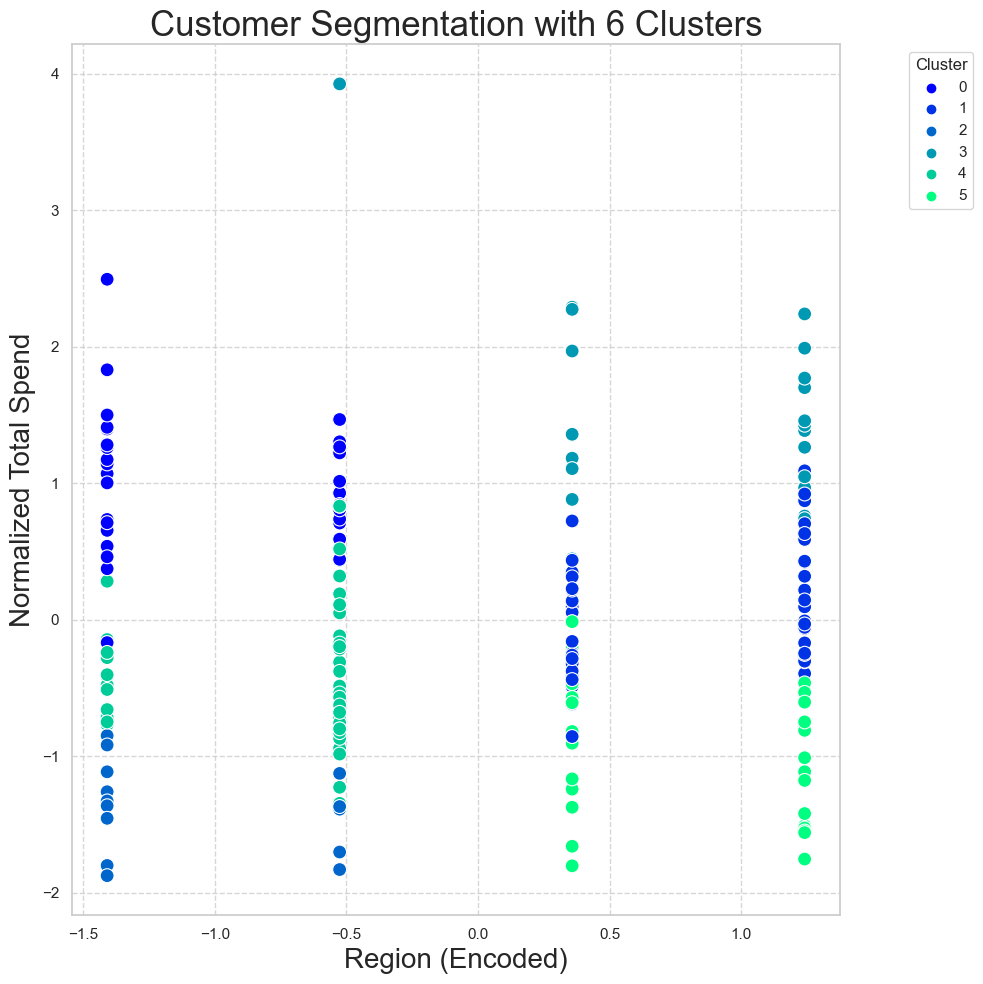

In [55]:
plt.figure(figsize=(10, 10))
sns.scatterplot(
    x=features[:, 0], y=features[:, 1], hue=data['Cluster'], palette="winter", s=100, edgecolor="white"
)
plt.title(f"Customer Segmentation with {optimal_k} Clusters", fontsize=25)
plt.xlabel("Region (Encoded)", fontsize=20)
plt.ylabel("Normalized Total Spend", fontsize=20)
plt.legend(title="Cluster", bbox_to_anchor=(1.08, 1), loc="upper left")
plt.grid(True, linestyle='--', alpha=0.8)
plt.tight_layout()
plt.show()

In [64]:
print(f"Optimal Number of Clusters: {optimal_k}")
print(f"Davies-Bouldin Index for Optimal Clusters: {min(db_indexes):.2f}")

Optimal Number of Clusters: 6
Davies-Bouldin Index for Optimal Clusters: 0.91
